In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [3]:
a = pd.read_csv('california500')
b = a.corr()
x = a.drop(['Price'], axis = 1)
x.head()

y = a['Price']
y.head()

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

model = LinearRegression()
model.fit( x_train, y_train )

y_predict = model.predict( x_test )
print(f'Test:\n\n{y_test}\n\nPredictions:\n')
print(y_predict)

len(y_test)
print(x)

Test:

90     1.625
254    1.024
283    3.710
445    1.856
461    2.417
       ...  
372    1.079
56     0.875
440    1.448
60     0.757
208    1.227
Name: Price, Length: 100, dtype: float64

Predictions:

[1.31554746 1.36198892 3.3994476  2.27189296 2.08456962 1.8826626
 0.73296091 2.4390206  1.63335271 2.17987091 1.08750684 1.32933017
 2.44943574 1.94687046 1.22232643 0.79509683 2.2725105  1.97395068
 3.29328326 1.39644392 1.24462193 2.05021784 1.62641474 2.22343635
 1.7651393  1.99597452 1.78481229 2.02893906 1.93033722 2.2639445
 2.79776793 2.97566026 3.48690335 1.31954017 1.45543977 2.06485011
 1.00100819 2.12695797 1.2401365  1.52750584 0.30880715 1.60806376
 4.2548607  1.90115675 1.36343686 4.40568731 1.56342487 0.9345887
 3.58693044 1.72269181 1.71023072 1.4046597  0.32038823 1.81091811
 3.71902693 2.21003067 0.92902463 1.35161451 2.06616552 1.08429559
 0.79974395 1.95477802 2.58381574 2.92720122 1.60091751 0.99078202
 2.17758115 2.18534102 2.23044411 1.04582611 3.0608505  0.73

In [4]:
r2_score(y_test, y_predict) # getting r2 of current model
mean_absolute_error(y_test, y_predict)
mean_squared_error(y_test, y_predict)
np.sqrt(mean_squared_error(y_test, y_predict)) # rmse

0.5279689137061647

					Range of y_test's data points:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

					Orignal 20% data points of y:

90     1.625
254    1.024
283    3.710
445    1.856
461    2.417
       ...  
372    1.079
56     0.875
440    1.448
60     0.757
208    1.227
Name: Price, Length: 100, dtype: float64

					Predicted 20% data points of y:

[1.31554746 1.36198892 3.3994476  2.27189296 2.08456962 1.8826626
 0.73296091 2.4390206  1.63335271 2.17987091 1.08750684 1.32933017
 2.44943574 1.94687046 1.22232643 0.79509683 2.2725105  1.97395068
 3.29328326 1.39644392 1.24462193 2.05021784 1.62641474 2.22343635
 1.7651393  1.99597452 1.78481229 2.02893906 

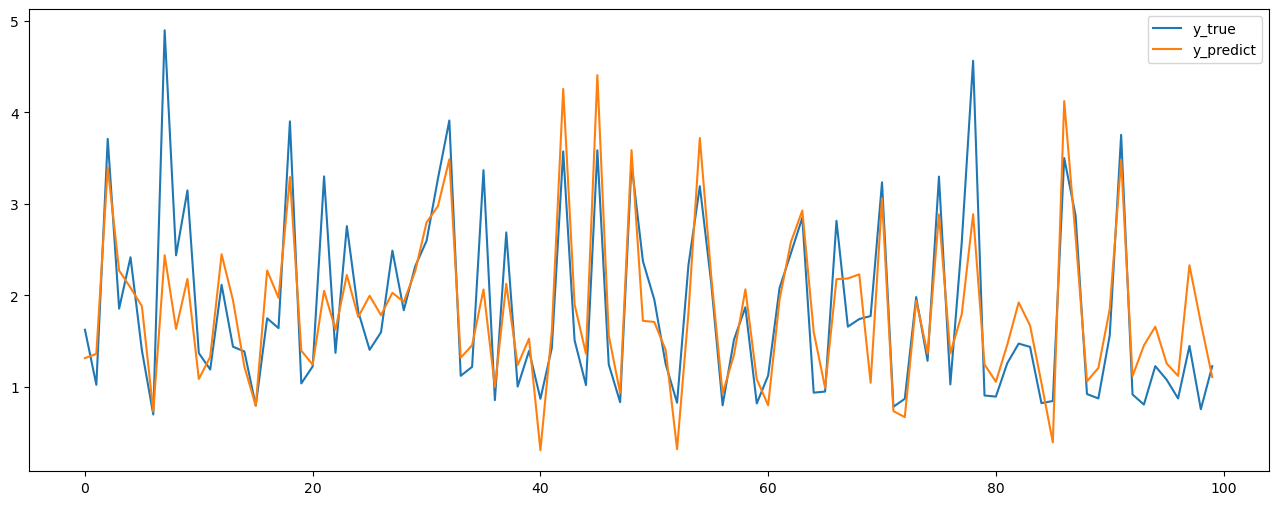

In [5]:
plt.subplots(figsize = (16,6))
x_points = list(range(len(y_test)))
print(f'\t\t\t\t\tRange of y_test\'s data points:\n\n{x_points}')
print(f'\n\t\t\t\t\tOrignal 20% data points of y:\n\n{y_test}')
print(f'\n\t\t\t\t\tPredicted 20% data points of y:\n\n{y_predict}')
plt.plot(x_points, y_test, label = 'y_true')
plt.plot(x_points, y_predict, label = 'y_predict')
plt.legend()


##
### Plotting Learning Curves
##

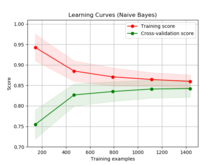

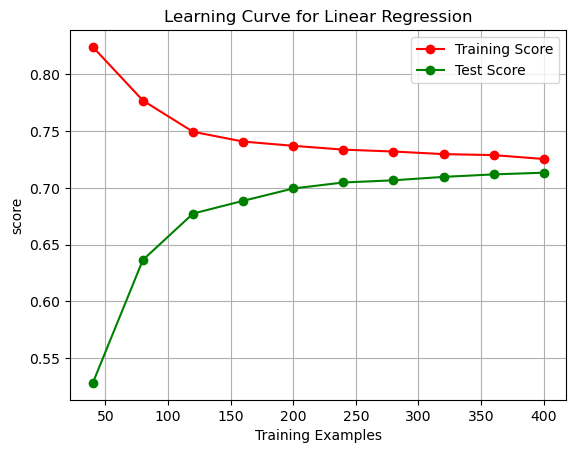

In [21]:
from sklearn.model_selection import learning_curve, ShuffleSplit
def plot_learning_curve(estimator, title, x, y, ylim = None, cv = None, train_size = np.linspace(0.1, 1, 10)) :
    
    # np.linspace(0.1, 1, 10) = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv = cv, train_sizes = train_size)
    
    train_scores_mean = np.mean(train_scores, axis = 1)
  #  train_scores_std = np.std(train_scores, axis = 1)
    
    test_scores_mean = np.mean(test_scores, axis = 1)
  #  test_scores_std = np.std(test_scores, axis = 1)
    
    plt.grid()
    
   # plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.168,
    #                color = 'red')
    
   # plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.168,
   #                 color = 'green')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Test Score')
    plt.legend(loc = 'best')
    
   # return plt

title = 'Learning Curve for Linear Regression'
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)
model = LinearRegression()
plot_learning_curve(model, title, x, y, ylim = None, cv = cv)
plt.show()

so tell me whether I am right or wrong, here in this image of 500 rows dataset, first we trained 10%(50 rows) and on training 40 rows the test_score is 0.53, then we trained 20%(100 rows) and on training 80 rows the test_score is 0.64, then we trained 30%(150 rows) and on training 120 rows the test_score is 0.68 and so on till we trained 800%(400 rows) and on training 400 rows the test_score is 0.72, right

#### The performance metrics stabilize, indicating that adding more training examples does not significantly change the model's performance.

#### Training Examples in the Learning Curve
#### In the context of the learning curve you provided:

#### 50 training examples: The model was trained on 50 such rows of data.
#### 100 training examples: The model was trained on 100 such rows of data.
#### And so on...
#### As the number of training examples increases, the model generally learns better and its performance improves, which is what the learning curve illustrates.

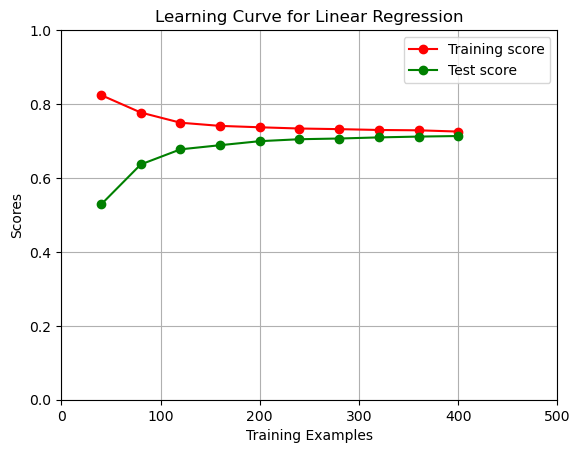

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.linear_model import LinearRegression

def plot_learning_curve(estimator, x, y, ylim=None, xlim=None, cv=None, train_size=np.linspace(0.1, 1, 10)):
    plt.figure()
    plt.title('Learning Curve for Linear Regression')
    plt.xlabel('Training Examples')
    plt.ylabel('Scores')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, train_sizes=train_size)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test score')
    
    if ylim is not None:
        plt.ylim(ylim)
    
    if xlim is not None:
        plt.xlim(xlim)
    
    plt.legend(loc='best')
    plt.show()

title = 'Learning Curve for Linear Regression'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
model = LinearRegression()

# Define the x and y limits for zooming
x_limits = (0, 500)  # Change these values to zoom in on the x-axis
y_limits = (0, 1)  # Change these values to zoom in on the y-axis

plot_learning_curve(model, x, y, ylim=y_limits, xlim=x_limits, cv=cv)
